In [12]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os

In [3]:
df=pd.read_csv('FlightDetails.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# Dropping the unwanted column
df=df.drop('Unnamed: 0',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [5]:
# Stastical Description of Data
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
df[["duration","days_left","price"]].corr().T

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [10]:
df.shape

(300153, 11)

In [11]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

### _Indigo is the most popular airline as per the dataset_

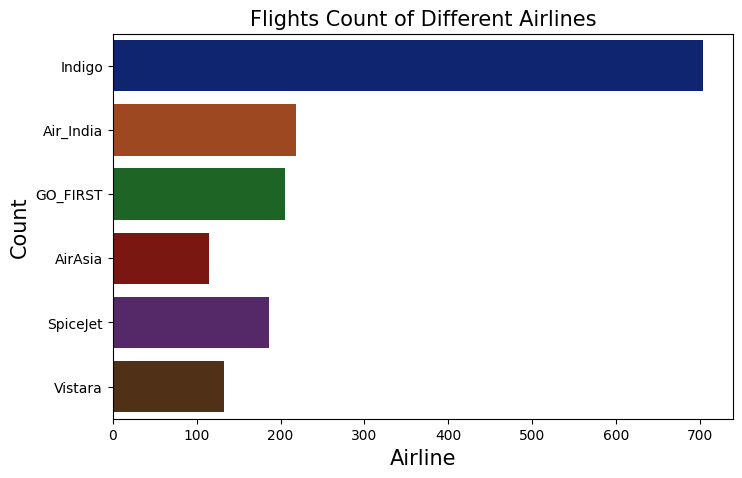

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='dark')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [14]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

### _Economy class is the most flown_

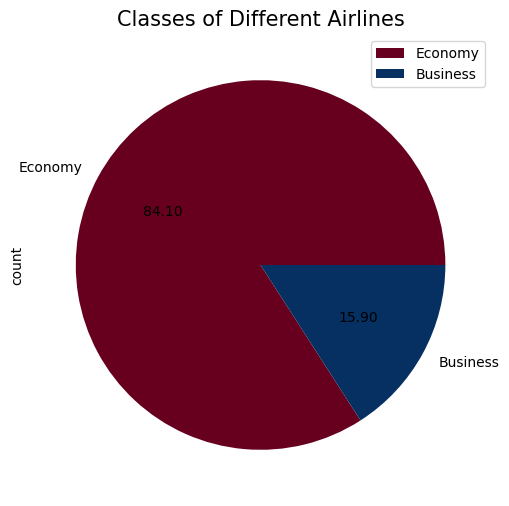

In [17]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='RdBu')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

### **Relationship between airlines and price**


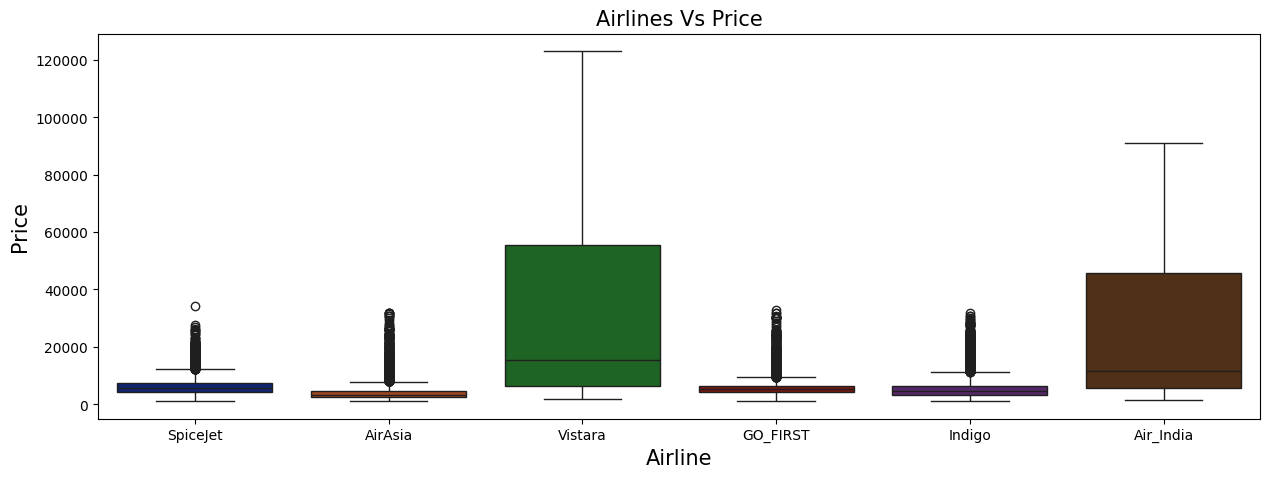

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='dark')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


- _As we can see Vistara has Maximum Price range_

- _Vistara and Air_India Airlines Have Maximum Price when compared to Others_

- _SpiceJet , AirAsia , GO_First and Indigo has some what equal prices_

### **Relationship between ticket class and price**

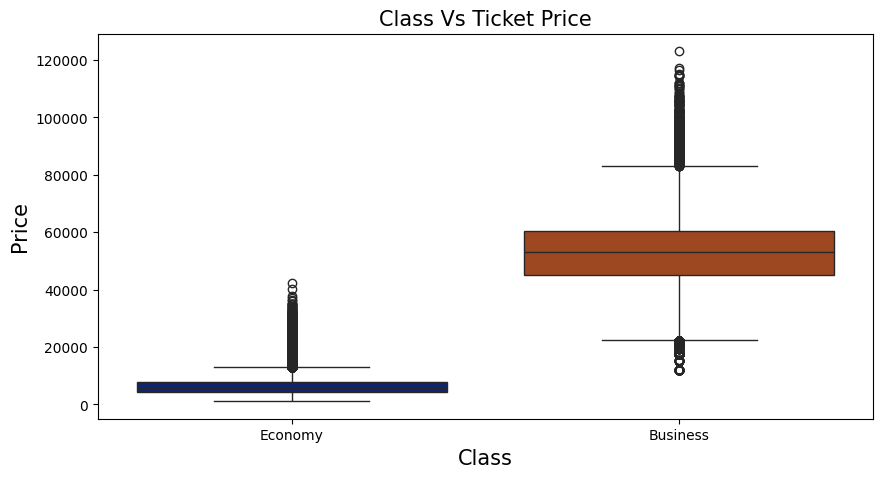

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='dark')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

_Ticket Price is Maximum for Bussiness Class When compared to Economy Class_

### **Relationship between ticket price and number of stops**

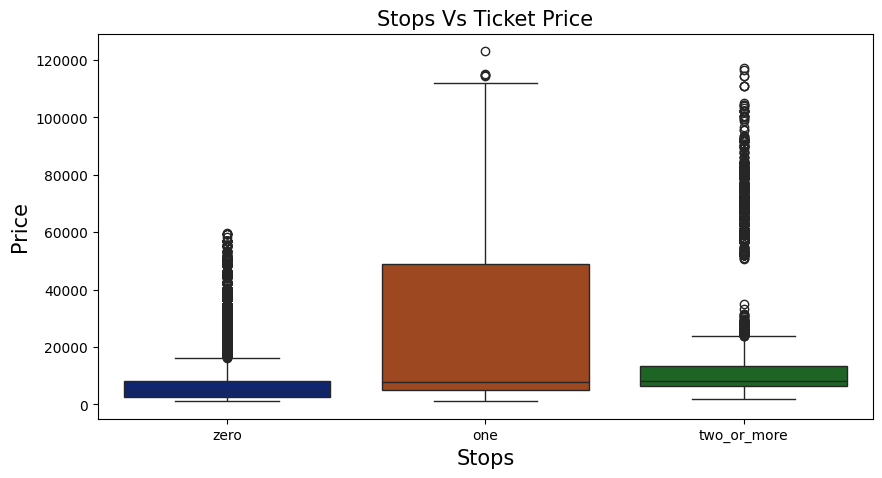

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='dark')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

_Flights with a single stops are the most expensive_

### **Relationship between departure/arrival time and ticket price**

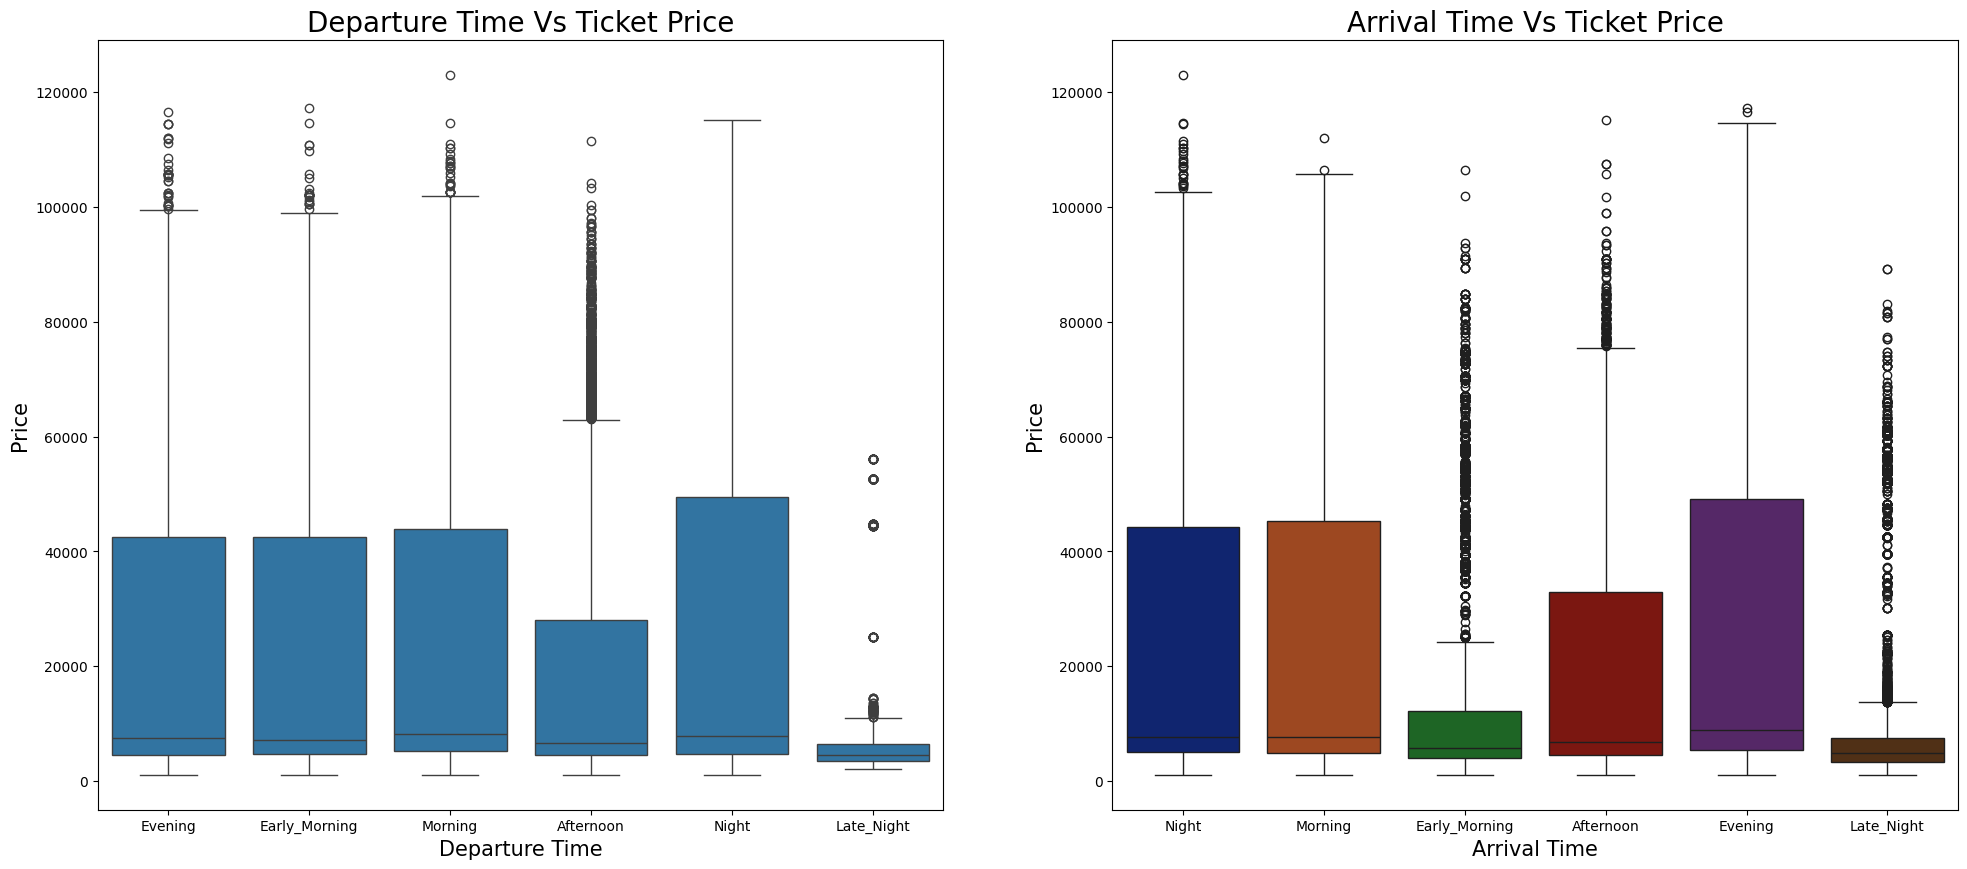

In [28]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='dark')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

1. Departure Time Vs Ticket Price

- _Flights departing at nights are comparatively a bit more expensive._
- _Flights departing at late nights are the cheapest._
- _Flights at other times of the day are around the same price._

2. Arrival Time Vs Ticket Price

- _Flights arriving late nights are the cheapest._
- _Flights arriving early mornings are also cheap._
- _Ticket Price is almost equal for flights arriving at Morning and Night_

### **Relationship between origin/destination cities and price**

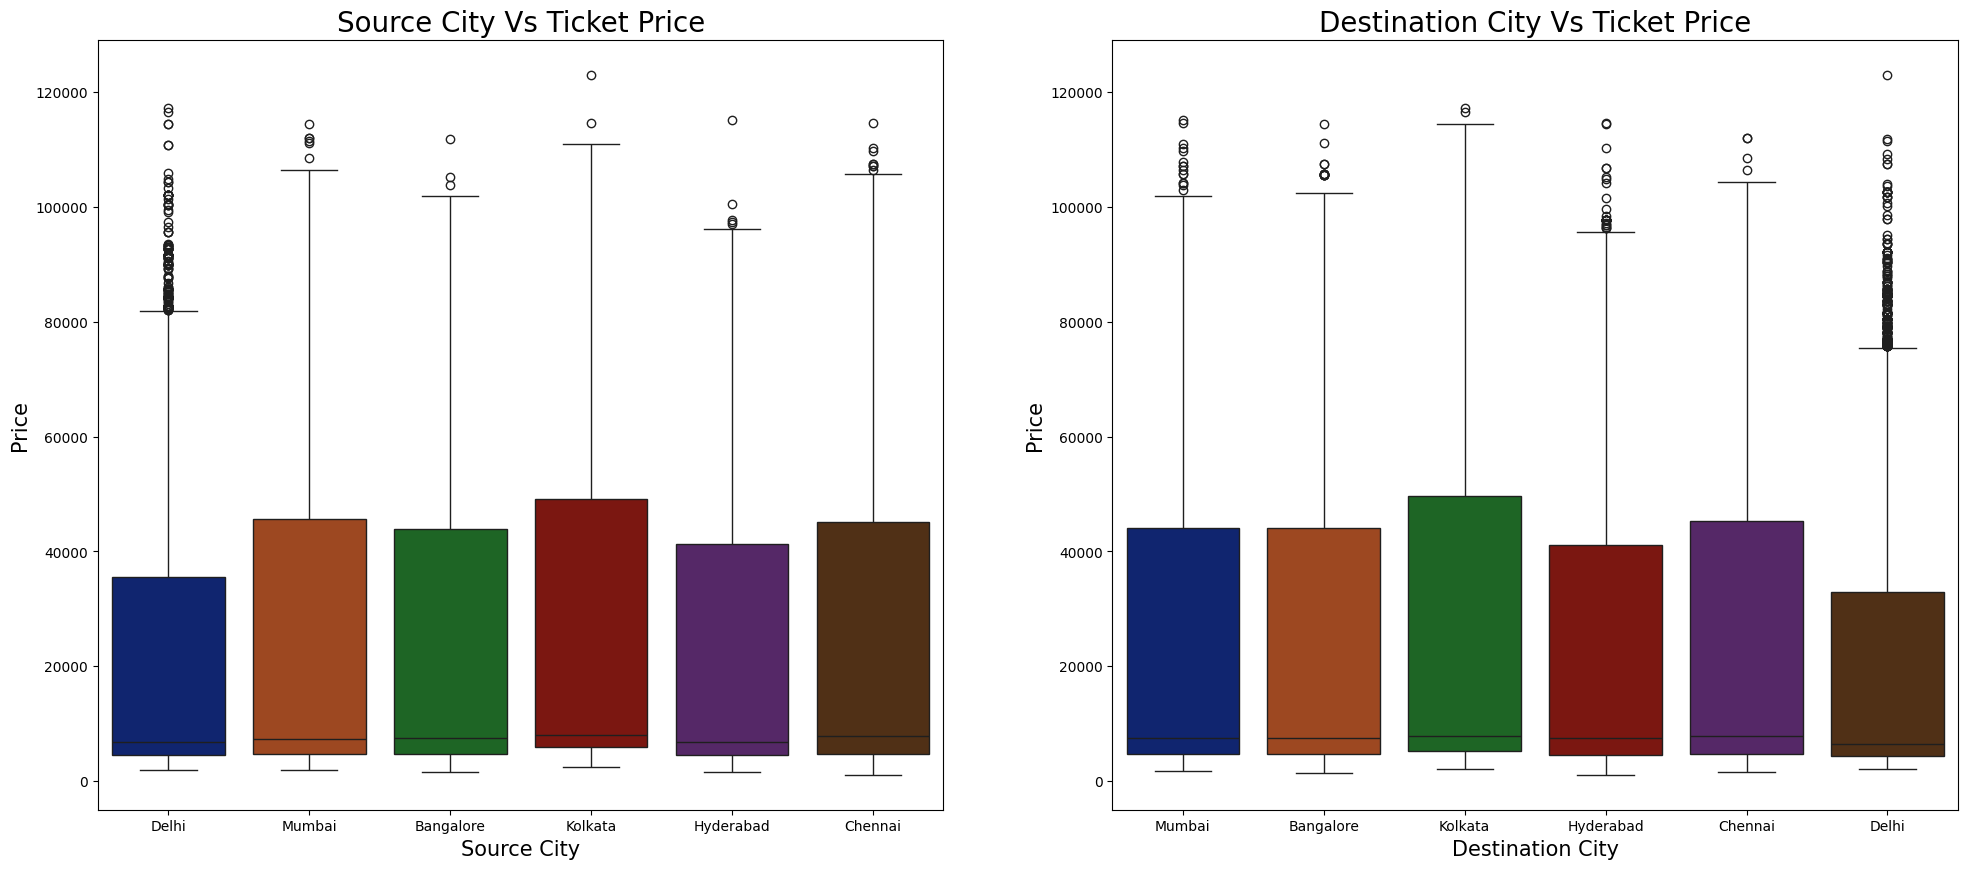

In [31]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df,palette='dark')
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='dark')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

_The place of arrival or departure doesn't appear to affect the price a lot, but the flights from/to delhi seems to be cheaper comparatively._

### **Variation of price based on the duration of travel**

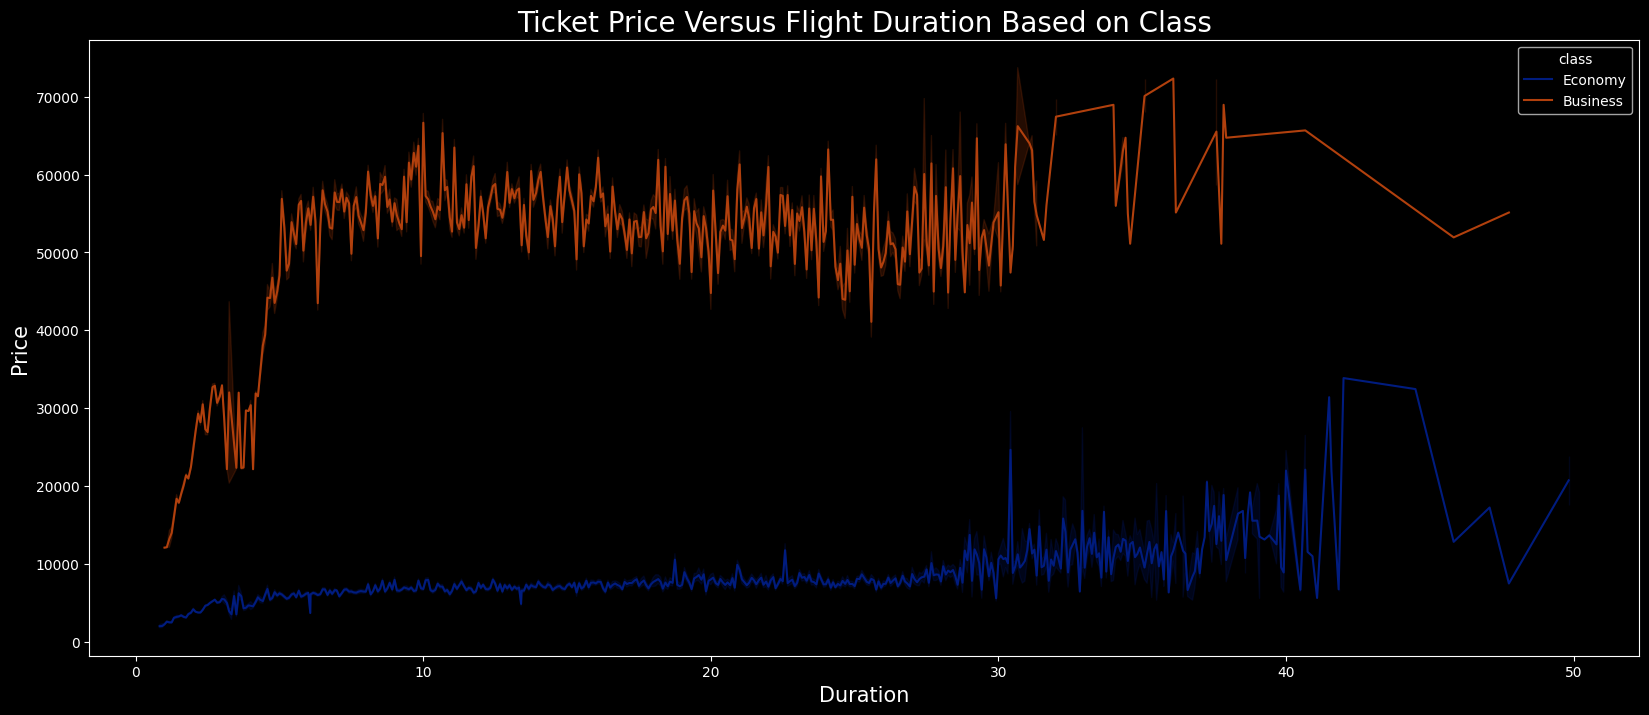

In [32]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='dark')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

_As expected, as the duration increases price increases, more prone to flight durations longer than 40 hours._

### **Variation of price based on the days left**

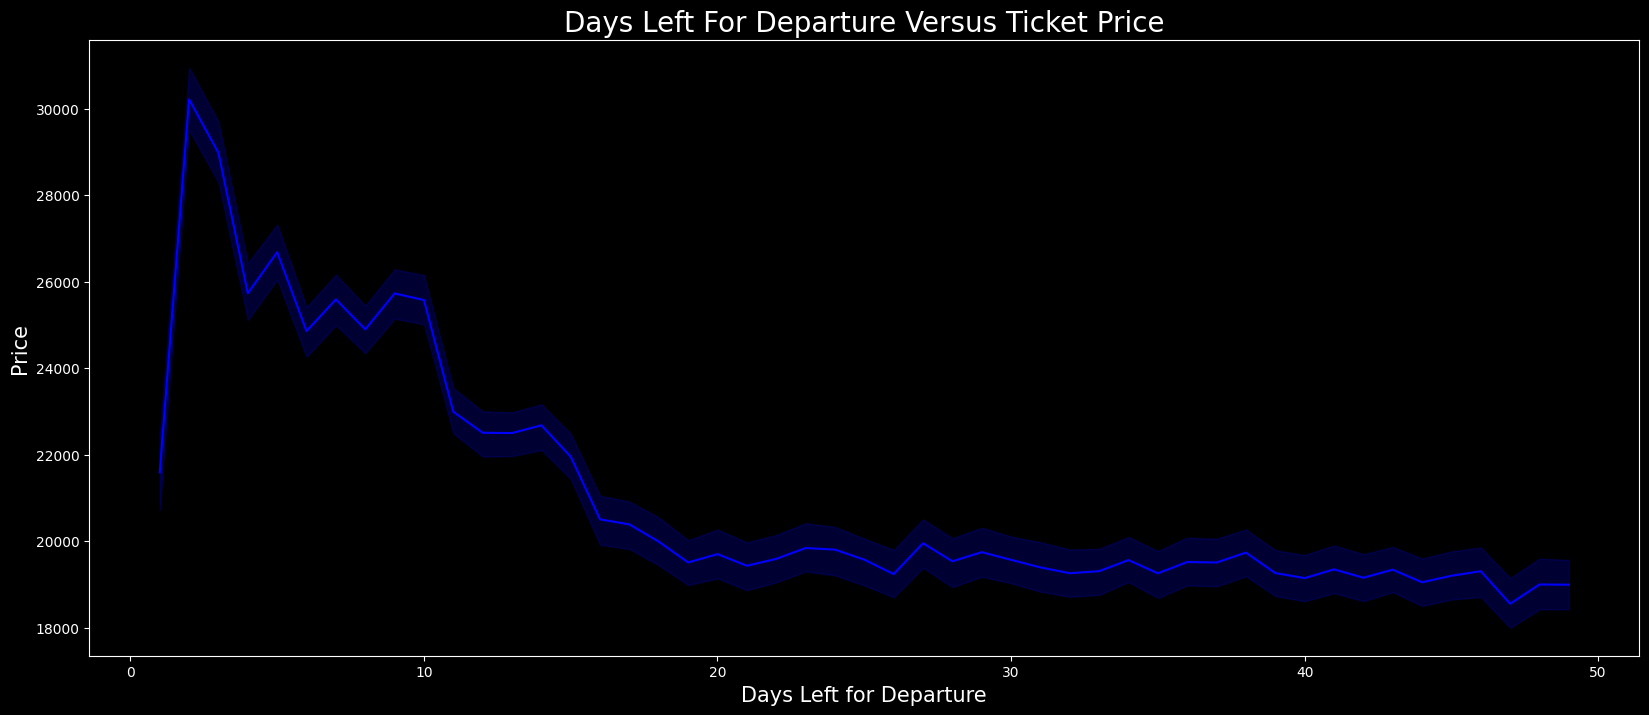

In [33]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

_Flight prices start to increase as the number of days left comes below 20._

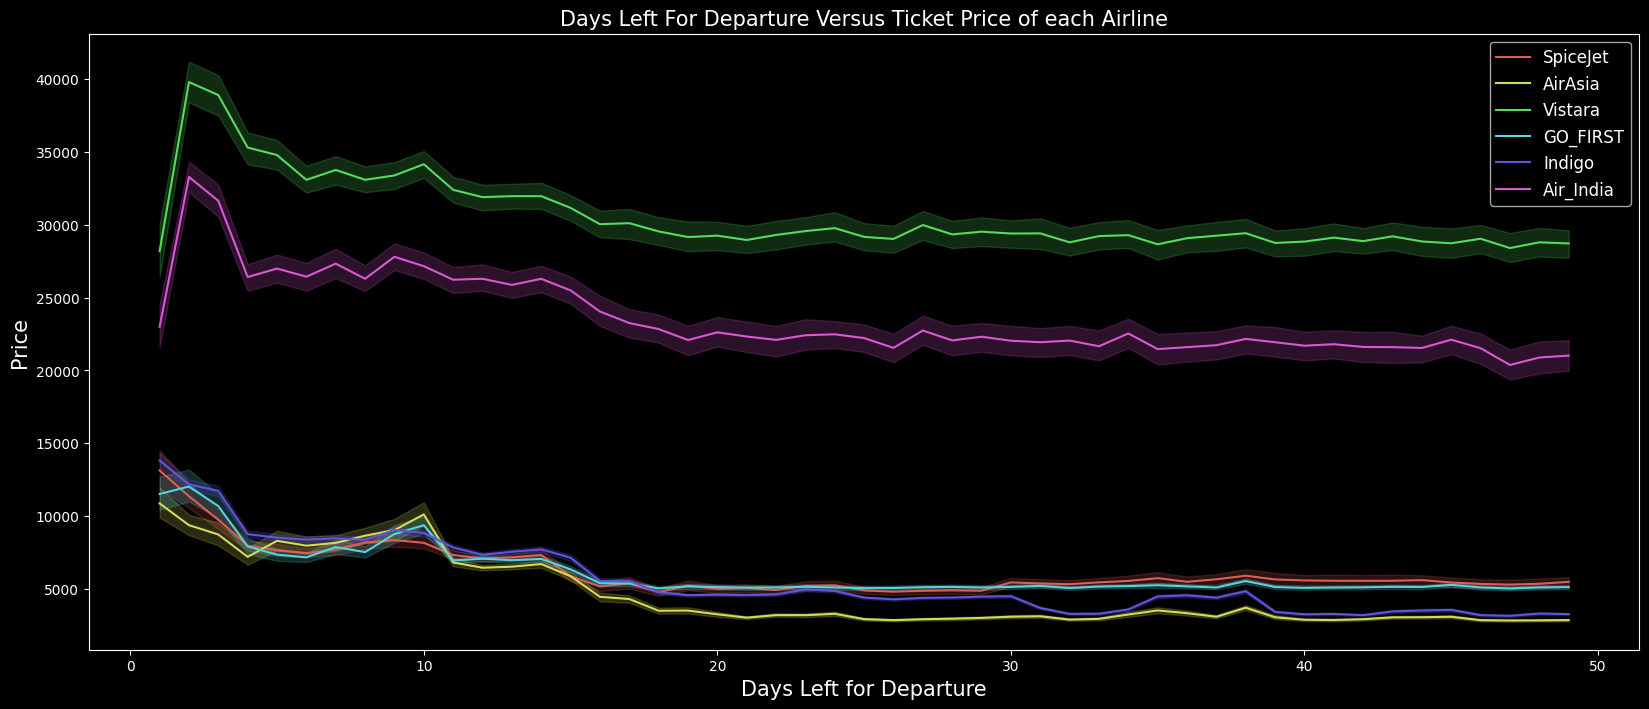

In [34]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

_Irrespective of the flight, prices are maximum when the number of days are 2 or less._

### Number of flights based on routes

In [36]:
df.groupby(['flight', 'source_city', 'destination_city', 'airline', 'class'], as_index=False) \
  .count() \
  .groupby(['source_city', 'destination_city'], as_index=False)['flight'] \
  .count() \
  .sort_values(by='flight', ascending=False) \
  .head(10)


,source_city,destination_city,flight
14,Delhi,Mumbai,364
10,Delhi,Bangalore,310
13,Delhi,Kolkata,306
27,Mumbai,Delhi,282
11,Delhi,Chennai,258
29,Mumbai,Kolkata,240
25,Mumbai,Bangalore,228
1,Bangalore,Delhi,227
12,Delhi,Hyderabad,224
22,Kolkata,Delhi,185


_Most flights are operating in the route Delhi-Mumbai._

### **Price of different airlines over different routes**

In [37]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().sort_values(by='price', ascending=False).head(10)

,airline,source_city,destination_city,price
150,Vistara,Bangalore,Kolkata,35746.714874
160,Vistara,Delhi,Kolkata,35702.441732
176,Vistara,Mumbai,Kolkata,35223.862417
172,Vistara,Mumbai,Bangalore,35029.880315
151,Vistara,Bangalore,Mumbai,34961.383271
169,Vistara,Kolkata,Delhi,33792.181332
167,Vistara,Kolkata,Bangalore,33501.412807
171,Vistara,Kolkata,Mumbai,33416.101911
156,Vistara,Chennai,Mumbai,32662.127337
173,Vistara,Mumbai,Chennai,32181.946251


_Vistara flights are the most expensive ones._